In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
#from keras.models import Sequential

In [23]:
classifier = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    
    tf.keras.layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    
    tf.keras.layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    
    tf.keras.layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    
    tf.keras.layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 2 , activation = 'softmax'),
])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [24]:

#binary outcome

In [25]:
#compiling the cnn



In [26]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)       

In [27]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.001)

In [29]:

results = classifier.fit(
                    train_generator,
                    steps_per_epoch=163 ,
                    epochs=15,
                    validation_data=validation_generator,
                    #validation_steps=len(validation_dataset.filenames )//32,
                    verbose=1,
                    callbacks=[earlyStopping, mcp_save,learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 61s 363ms/step - loss: 0.5677 - accuracy: 0.8389 - val_loss: 3.1713 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 61s 376ms/step - loss: 0.2106 - accuracy: 0.9219 - val_loss: 4.4125 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 61s 372ms/step - loss: 0.1795 - accuracy: 0.9260 - val_loss: 1.5469 - val_accuracy: 0.6330
Epoch 4/15
163/163 [==============================] - 62s 378ms/step - loss: 0.1641 - accuracy: 0.9283 - val_loss: 1.4288 - val_accuracy: 0.6330
Epoch 5/15
163/163 [==============================] - 61s 370ms/step - loss: 0.1462 - accuracy: 0.9444 - val_loss: 0.3282 - val_accuracy: 0.8462
Epoch 6/15
163/163 [==============================] - 61s 376ms/step - loss: 0.1351 - accuracy: 0.9559 - val_loss: 0.2777 - val_accuracy: 0.8782
Epoch 7/15
163/163 [==============================] - 60s 371ms/step - loss: 0.1367 - accuracy: 0.9522 - val_loss: 0.2738 - val_ac

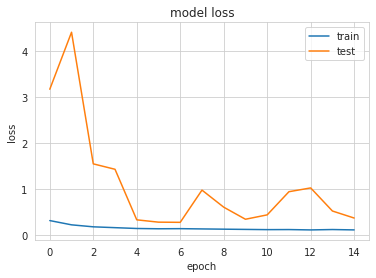

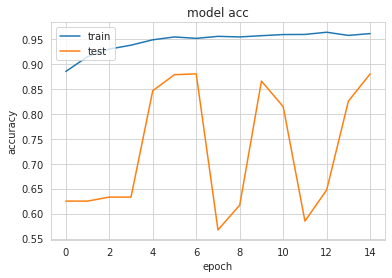

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = results
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Classification Report

In [31]:
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)

[[162  72]
 [  3 387]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       234
           1       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.90      0.88      0.87       624



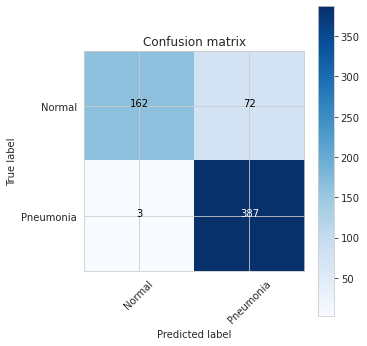

In [32]:
from sklearn.metrics import confusion_matrix
import numpy
pred= classifier.predict(validation_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = validation_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report)

Found 16 images belonging to 2 classes.
np.argmax
[1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0]
true classes
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[6 2]
 [2 6]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



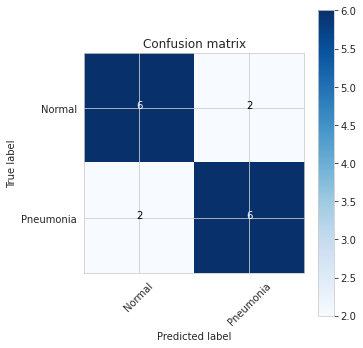

In [33]:
from sklearn.metrics import confusion_matrix
import numpy
test_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/val',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

pred= classifier.predict(test_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
print("np.argmax")
print(pred)
true_classes = test_generator.classes
#print(test_generator.filenames)
print("true classes")
print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 